<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/MLI-XAI/LIME_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:
- https://github.com/marcotcr/lime
- https://github.com/RikKraanVantage/explainable_AI

In [1]:
import os
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import decode_predictions

In [2]:
!pip list | grep scikit-image

scikit-image                  0.19.2


In [ ]:
!pip install --upgrade scikit-image

In [3]:
import tensorflow as tf
from typing import Tuple

EFFICIENTNET_VERSION = {
    'B0': {'model': tf.keras.applications.EfficientNetB0, 'img_size': 224},
    'B1': {'model': tf.keras.applications.EfficientNetB1, 'img_size': 240},
    'B2': {'model': tf.keras.applications.EfficientNetB2, 'img_size': 260},
    'B3': {'model': tf.keras.applications.EfficientNetB3, 'img_size': 300},
    'B4': {'model': tf.keras.applications.EfficientNetB4, 'img_size': 380},
    'B5': {'model': tf.keras.applications.EfficientNetB5, 'img_size': 456},
    'B6': {'model': tf.keras.applications.EfficientNetB6, 'img_size': 528},
    'B7': {'model': tf.keras.applications.EfficientNetB7, 'img_size': 600},
}


def get_efficientnet(
        version: str = 'B0', weights: str = 'imagenet'
) -> Tuple[tf.keras.Model, callable]:
    """
    Function to get one of the EfficientNet models with pretrained weights. For
    more information on image resolution and number of parameters for each of
    the EfficientNet models see:
    https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
    """
    img_size = EFFICIENTNET_VERSION[version]['img_size']
    print(img_size)
    def preprocess_image(x):
        return tf.image.resize(x, (img_size, img_size))

    return (
        EFFICIENTNET_VERSION[version]['model'](weights=weights),
        preprocess_image
    )

In [4]:
os.chdir('..')

In [5]:
# Get model and corresponding preprocess function
model, preprocess_image = get_efficientnet(version='B0', weights='imagenet')

224


In [6]:
import numpy as np

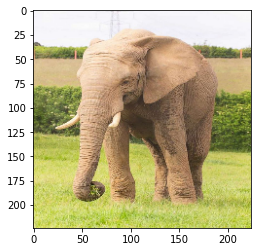

In [7]:
img = PIL.Image.open('/content/elephant.jpg') 
img = preprocess_image(np.array(img).astype(int))
plt.imshow(img.numpy().astype(int));

In [8]:
# Get predictions (expand dims for single image as model expects size (None, 224, 224, 3))
preds = model(np.expand_dims(img, 0))

In [9]:
# Decode it based on keras imagenet_utils package
decoded_preds = decode_predictions(preds.numpy())[0]
print(f"Predicted species: {decoded_preds[0][1]} | Probability: {decoded_preds[0][2]:.2f}")

Predicted species: African_elephant | Probability: 0.39


In [10]:
import sys 
sys.path.insert(0, '/content')
%cd /content/
%pwd

/content


'/content'

In [11]:
from lime_explaination import LIME
LIME = LIME(img, model, random_seed=10)

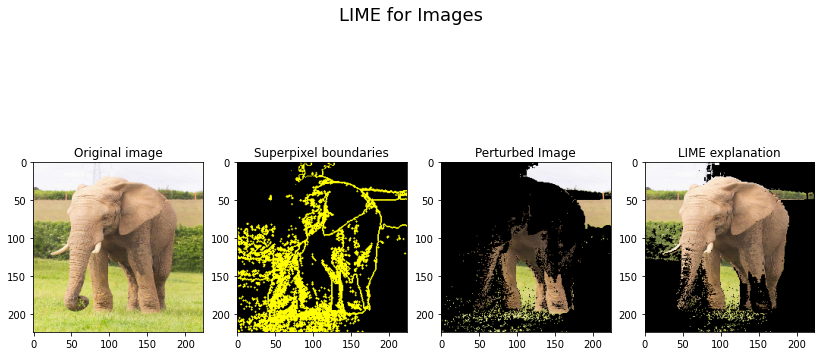

In [12]:
plt.figure(figsize=(14, 7))
plt.subplot(141)
plt.imshow(img.numpy().astype(int))
plt.title('Original image')
plt.subplot(142)
LIME.plot_super_pixel_boundary()
plt.subplot(143)
LIME.plot_perturbed_image()
plt.subplot(144)
LIME.plot_explainable_image(explainable_model_type='decision_tree_regressor')
plt.suptitle('LIME for Images', size=18)
plt.show()

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [14]:
resnet50_model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


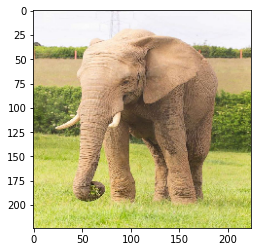

In [15]:
img_path = '/content/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
resnet50_preds = resnet50_model.predict(x)

In [17]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(resnet50_preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.7843), ('n02504013', 'Indian_elephant', 0.12243433), ('n01871265', 'tusker', 0.091091566)]


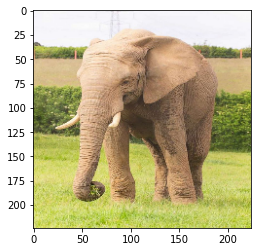

In [18]:
img = PIL.Image.open('/content/elephant.jpg') 
img = preprocess_image(np.array(img))
plt.imshow(img.numpy().astype(int));

In [19]:
from lime_explaination import LIME 
LIME = LIME(img, resnet50_model, random_seed=10)

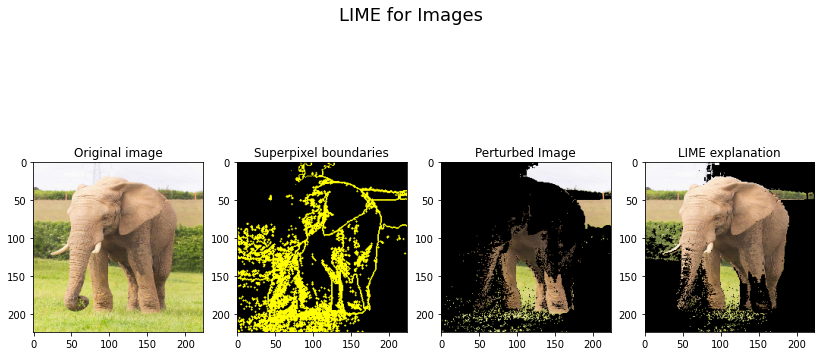

In [20]:
plt.figure(figsize=(14, 7))
plt.subplot(141)
plt.imshow(img.numpy().astype(int))
plt.title('Original image')
plt.subplot(142)
LIME.plot_super_pixel_boundary()
plt.subplot(143)
LIME.plot_perturbed_image()
plt.subplot(144)
LIME.plot_explainable_image(explainable_model_type='decision_tree_regressor')
plt.suptitle('LIME for Images', size=18)
plt.show()

# **What is happening here to explain the prediction:**

1. Generate superpixel areas
2. Create perturbed images by randomly filling some of the superpixel areas with a solid black color
3. For each perturbed image: 
  - a. Make predictions for the perturbed image
  - b. Create weights based on the difference between the perturbed image and the original image (smaller distance == larger weight)
4. Fit a simple interpretable model using the predictions on all perturbed images and the created weights.
5. Define the number of superpixels that should be plotted and plot the superpixels with the highest importance in the simple model (i.e. coefficient if a Linear Regression is used).

# **Creating Superpixel Boundary**

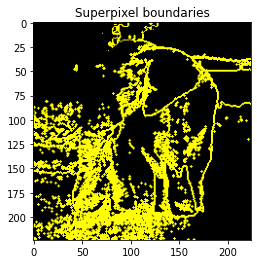

In [21]:
LIME.plot_super_pixel_boundary()

# **What is perturbed image?**
- Image enhancement Operator - image perturbation( )
- A function to take the image obtained with the background slowness and improve it by applying an image enhancement operator.

## **Plotting preturbed image:**

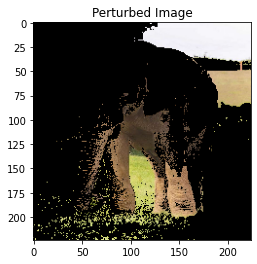

In [22]:
LIME.plot_perturbed_image()

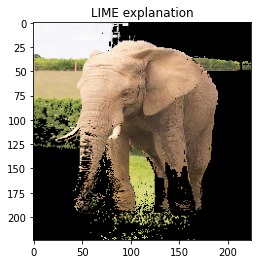

In [23]:
LIME.plot_explainable_image(explainable_model_type='decision_tree_regressor')